In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_excel("/kaggle/input/capstone-preprocessing/after_preprocessing.xlsx")
df

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value
0,0,Male,71,Yes,0,1,69,No Offer,Yes,18.41,...,Yes,Bank Withdrawal,109.95,7634.25,0.0,0,1270.29,8904.54,5,0
1,1,Female,66,No,0,0,8,Offer E,Yes,5.21,...,Yes,Credit Card,94.45,742.95,0.0,0,41.68,784.63,1,1
2,2,Male,36,Yes,0,1,17,No Offer,No,0.00,...,No,Mailed Check,34.40,592.75,0.0,0,0.00,592.75,3,0
3,3,Female,36,Yes,0,0,1,Offer E,No,0.00,...,Yes,Bank Withdrawal,29.85,29.85,0.0,0,0.00,29.85,3,0
4,4,Male,56,No,0,0,13,No Offer,Yes,46.92,...,Yes,Bank Withdrawal,20.40,251.65,0.0,0,609.96,861.61,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7082,Female,68,No,0,0,1,Offer E,Yes,45.80,...,Yes,Bank Withdrawal,69.60,69.60,0.0,0,45.80,115.40,2,1
7039,7083,Female,29,No,0,0,27,No Offer,Yes,1.31,...,Yes,Mailed Check,56.15,1439.35,0.0,0,35.37,1474.72,3,0
7040,7084,Male,69,No,0,0,66,No Offer,Yes,9.90,...,No,Credit Card,110.90,7432.05,0.0,0,653.40,8085.45,3,1
7041,7085,Male,53,No,0,0,31,No Offer,Yes,9.27,...,Yes,Bank Withdrawal,103.45,3066.45,0.0,0,287.37,3353.82,3,1


In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Value'],
      dtype='object')

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [7]:
df['Churn']=df['Churn Value'].replace({1: 'Yes', 0: 'No'})

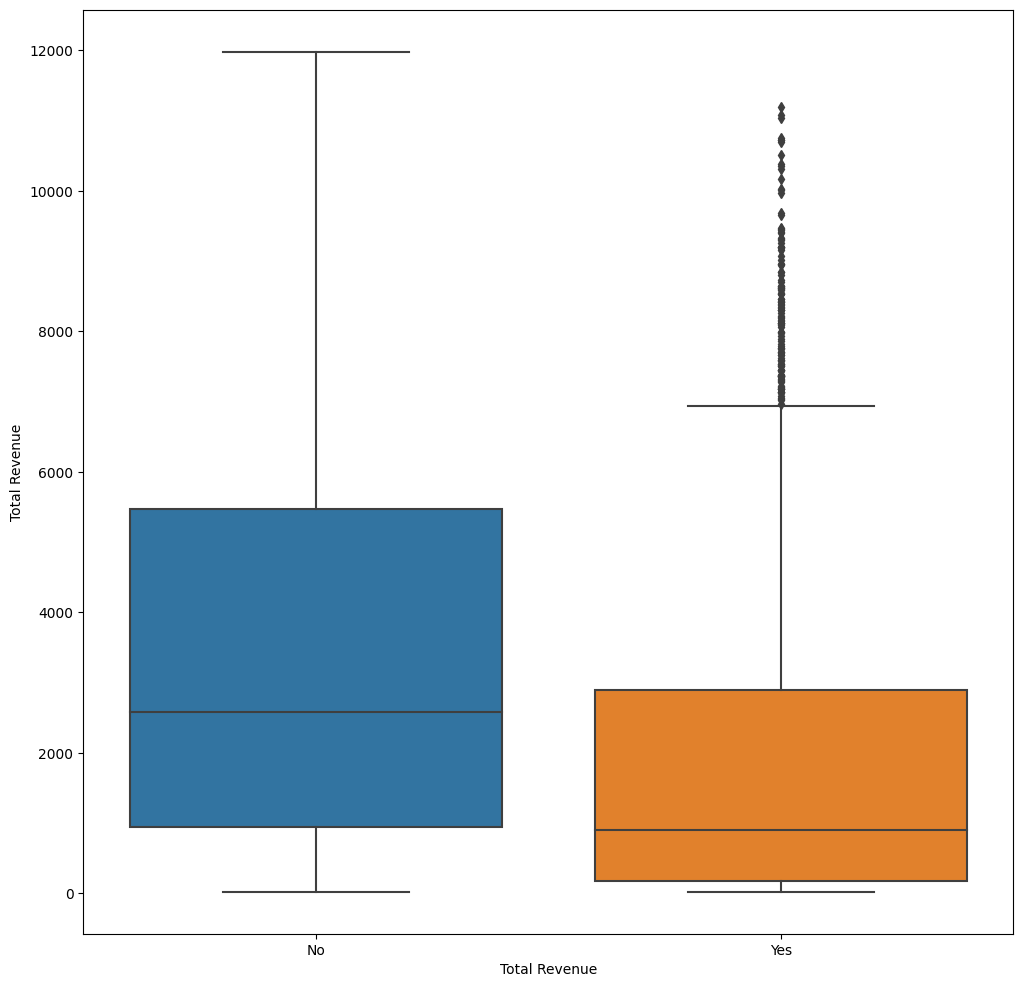

In [8]:
plt.figure(figsize=(12, 12))
sns.boxplot(y=df['Total Revenue'],x=df['Churn'])
plt.xlabel('Total Revenue')
plt.show()

In [9]:
df['Contract'].unique()

array(['Two Year', 'Month-to-Month', 'One Year'], dtype=object)

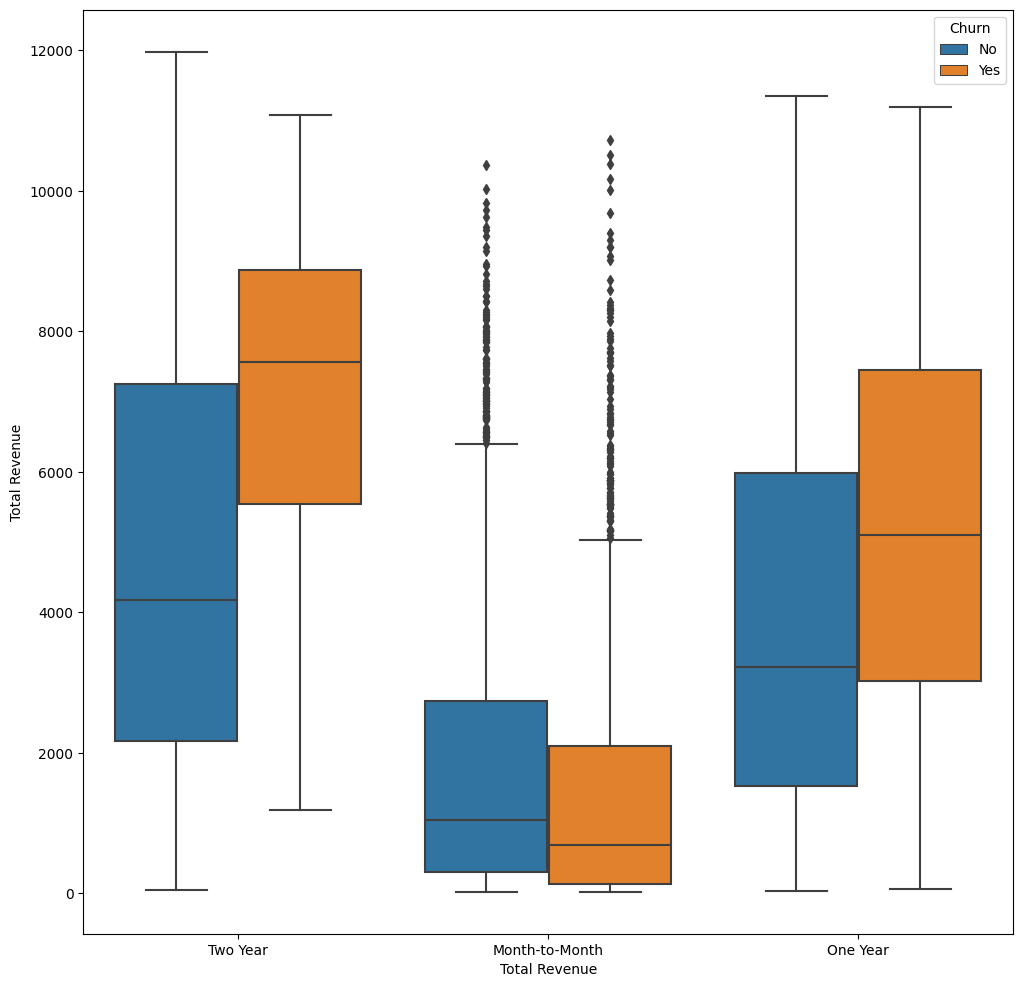

In [10]:
plt.figure(figsize=(12, 12))
sns.boxplot(y=df['Total Revenue'],x=df['Contract'],hue=df['Churn'])
plt.xlabel('Total Revenue')
plt.show()

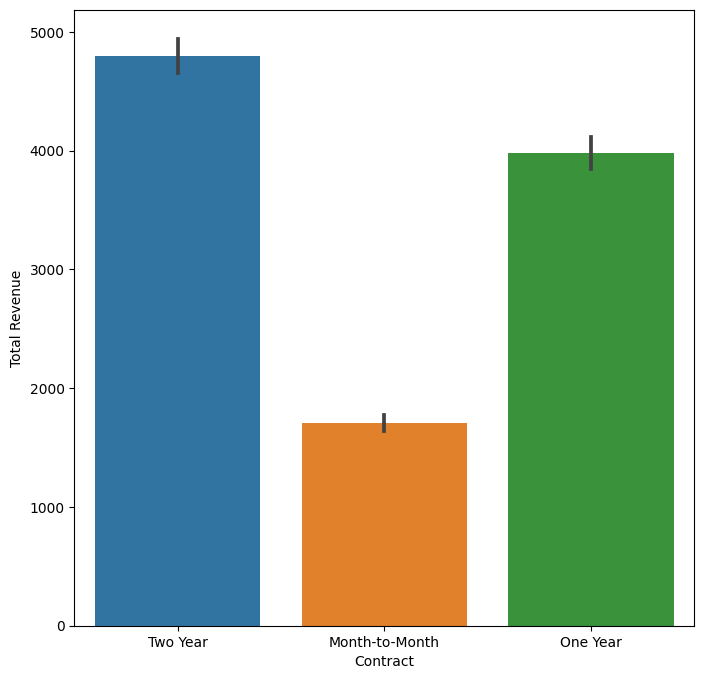

In [11]:
plt.figure(figsize=(8, 8))
sns.barplot(y='Total Revenue',x='Contract',data=df)
plt.show()

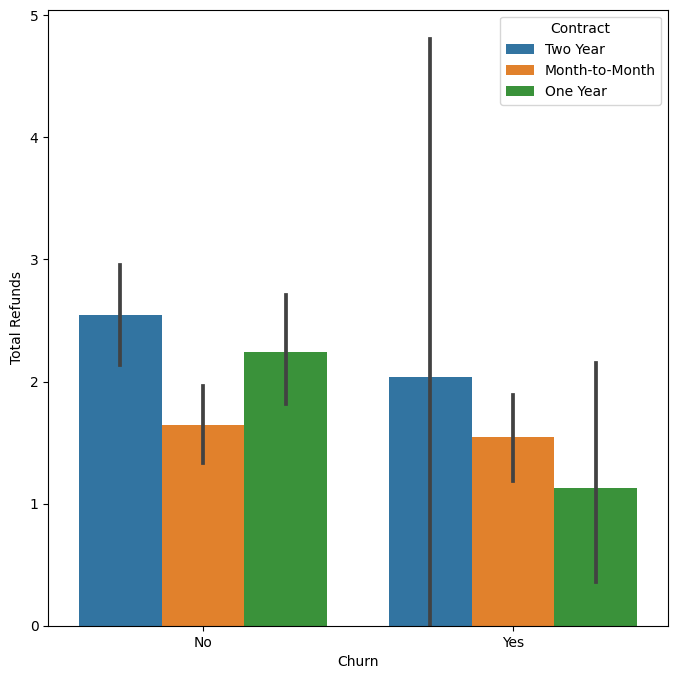

In [12]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Churn',y='Total Refunds',hue='Contract',data=df)
plt.show()

In [13]:
df['Satisfaction Score'].unique()

array([5, 1, 3, 4, 2])

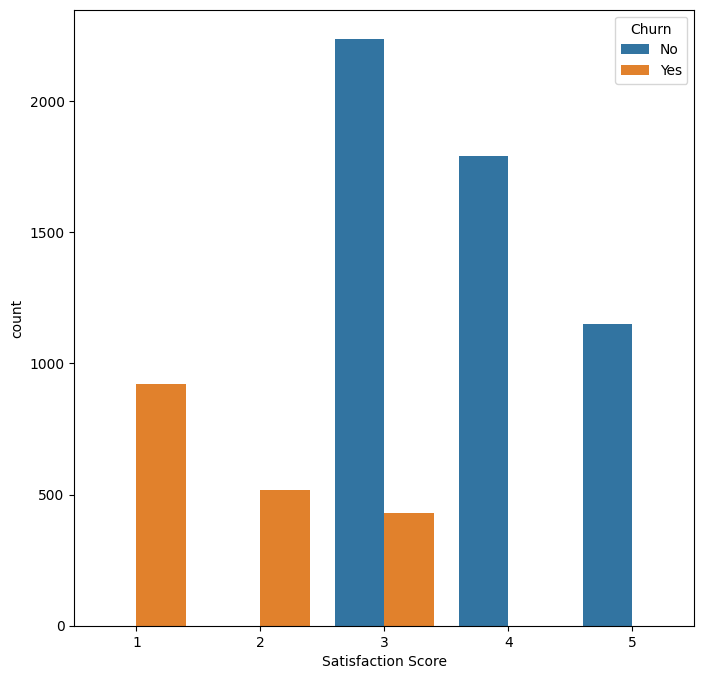

In [14]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Satisfaction Score',data=df,hue='Churn')
plt.show()

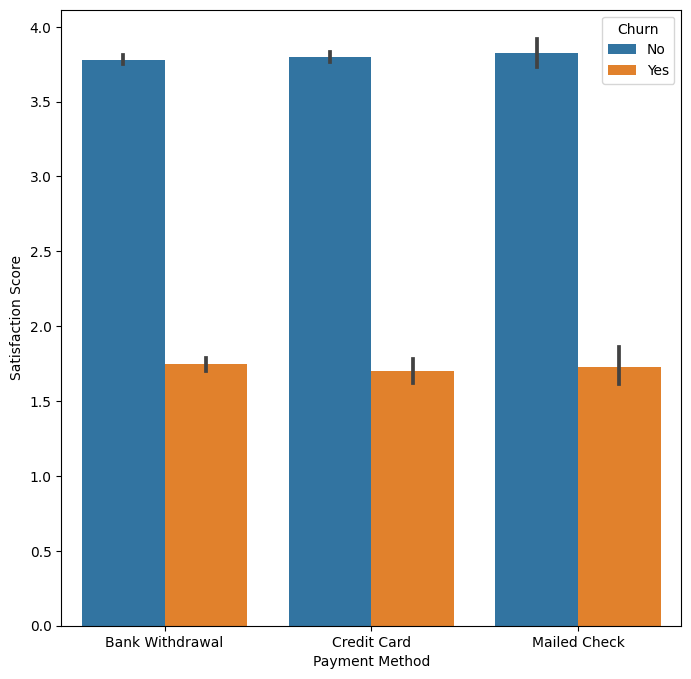

In [15]:
plt.figure(figsize=(8, 8))
sns.barplot(y='Satisfaction Score',x='Payment Method',data=df,hue='Churn')
plt.show()

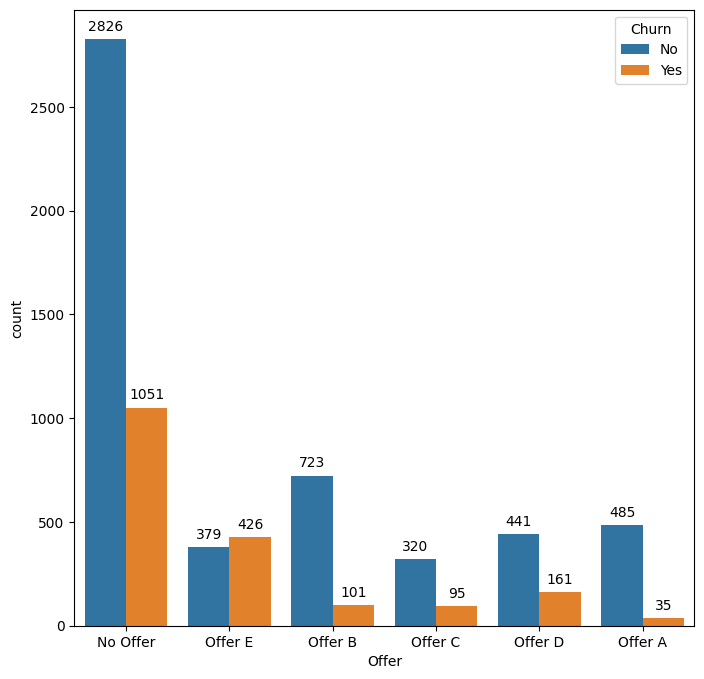

In [16]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Offer', data=df, hue='Churn')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [17]:
df_location=pd.read_excel('/kaggle/input/capstone-preprocessing/merging all the tables.xlsx')

In [18]:
df_location.shape

(7088, 58)

In [19]:
df_location.dropna(inplace=True)

In [20]:
df_location.columns

Index(['Unnamed: 0', 'Customer ID', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'Count_y', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Count_x', 'Quarter_x', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count_y.1', 'Quarter_y', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV'

In [21]:
# import plotly.express as px

# lat_log_df=df_location[['Latitude','Longitude']]

# fig = px.scatter_geo(lat_log_df, lat='Latitude', lon='Longitude', #size='mag',
#                      title='Earthquakes Around the World')
# fig.show()

In [22]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Assuming your dataset has columns 'Latitude', 'Longitude', and 'Orders'
# Replace 'df' with your actual DataFrame name
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_location.iterrows()]

# Add a heat map layer
HeatMap(heat_data).add_to(california_map)

# Display the map
california_map
